In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Read SHP file

The shp file contains the polygons where is a segment in the image

In [0]:
!pip install fiona

     |████████████████████████████████| 17.9MB 6.1MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6613 sha256=378edc3ddd30bb01d24994e56f7d8b97f1f9c1c1ba0e55340200580551a35598
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import fiona

In [0]:
i=0
for feat in fiona.open("Subprodutos/edificacoes_Area.shp"):
  i+=1
i

8153

In [0]:
shape = fiona.open("Subprodutos/edificacoes_Area.shp")
print(shape.schema)

{'properties': OrderedDict([('LAYER', 'str:13'), ('GM_TYPE', 'str:17'), ('ELEVATION', 'int:1')]), 'geometry': 'Polygon'}


In [0]:
#first feature of the shapefile
first = shape.next()
print(first) # (GeoJSON format)

{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('LAYER', 'EDIFICAÃ§ÃµES'), ('GM_TYPE', 'Unknown Area Type'), ('ELEVATION', None)]), 'geometry': {'type': 'Polygon', 'coordinates': [[(316050.6965211633, 9178082.34381869), (316053.1828535328, 9178080.288353918), (316049.135369725, 9178075.39243445), (316046.6490373555, 9178077.447899224), (316050.6965211633, 9178082.34381869)]]}}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  """Entry point for launching an IPython kernel.


In [0]:
with open('005.jgw', 'r') as file:
  contents = file.read()

In [0]:
print(contents.strip().split('\n'))

['0.2500', '0.0000', '0.0000', '-0.2500', '322000.0000', '9170000.0000']


## Draw polygons

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [0]:
img = np.zeros((512,512,3), np.uint8)
pts = np.array([(100,50),(200,300),(250,200),(300,400),(500,100),(100,50)], np.int32)
pts = pts.reshape((-1,1,2))
cv2.fillPoly(img,[pts],(255,255,255));

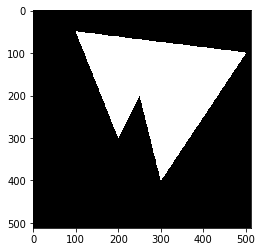

In [0]:
plt.imshow(img)

## Auxiliary functions

In [0]:
def coordinate2pixel(coordinate, image_jpw):
  '''
    Função para transformar um par de coordenadas em valores de pixel, dado os 
    valores da World File (JPW) da imagem.
    :param coordinate: (x1, y1) coordenadas a serem transformadas
    :param image_jpw: Array contendo os valores da world file. 
        source: http://webhelp.esri.com/arcims/9.3/General/topics/author_world_files.htm
        Array image_jpw: [A, D, B, E, C, F]
              source : http://webhelp.esri.com/arcims/9.3/General/topics/author_world_files.htm
              The values are inputs into the following formulas:

              x1 = Ax + By + C
              y1 = Dx + Ey + F

              where the variables represent the following:

              x1 = calculated x-coordinate of the pixel on the map
              y1 = calculated y-coordinate of the pixel on the map
              x = column number of a pixel in the image
              y = row number of a pixel in the image
              A = x-scale; dimension of a pixel in map units in x direction
              B,D = rotation terms
              C,F = translation terms; x,y map coordinates of the center of the upper-left pixel
              E = negative of y-scale; dimension of a pixel in map units in y direction
              
              |x| = |A B|^-1 @ |x1-C| 
              |y|   |D E|      |y1-F|
              
              pixel = scale_matrix^-1 * translation_matrix
  '''
  
  scale_matrix = np.array([[image_jpw[0], image_jpw[2]], [image_jpw[1], image_jpw[3]]])
  translation_matrix = np.array([[coordinate[0]-image_jpw[4]], [coordinate[1]-image_jpw[5]]])
  
  pixel = np.linalg.inv(scale_matrix) @ translation_matrix
  
  return pixel

def pixel2coordinate(pixel, image_jpw):
  '''
    Função para transformar um par de coordenadas em valores de pixel, dado os 
    valores da World File (JPW) da imagem.
    :param pixel: (x, y) pixel a ser transformado
    :param image_jpw: Array contendo os valores da world file. 
        source: http://webhelp.esri.com/arcims/9.3/General/topics/author_world_files.htm
        Array image_jpw: [A, D, B, E, C, F]
              source : http://webhelp.esri.com/arcims/9.3/General/topics/author_world_files.htm
              The values are inputs into the following formulas:

              x1 = Ax + By + C
              y1 = Dx + Ey + F

              where the variables represent the following:

              x1 = calculated x-coordinate of the pixel on the map
              y1 = calculated y-coordinate of the pixel on the map
              x = column number of a pixel in the image
              y = row number of a pixel in the image
              A = x-scale; dimension of a pixel in map units in x direction
              B,D = rotation terms
              C,F = translation terms; x,y map coordinates of the center of the upper-left pixel
              E = negative of y-scale; dimension of a pixel in map units in y direction
  '''
  
  x1 = (image_jpw[0]*pixel[0] + image_jpw[2]*pixel[1] + image_jpw[4])
  y1 = (image_jpw[1]*pixel[0] + image_jpw[3]*pixel[1] + image_jpw[5])
  
  coordinate = (x1, y1)
  
  return coordinate

def check_coord_in_image(img_min_coords, img_max_coords, coordinate):
  if coordinate[0] >= img_min_coords[0] and coordinate[0] <= img_max_coords[0] and coordinate[1] >= img_min_coords[1] and coordinate[1] <= img_max_coords[1]:
    return True
  else:
    return False
  

In [0]:
%cd '/content/drive/My Drive/ITAú/TCC'

/content/drive/My Drive/ITAú/TCC


In [0]:
with open('005.jgw', 'r') as file:
  contents = file.read()
  
print(contents)

0.2500
0.0000
0.0000
-0.2500
322000.0000
9170000.0000



## Read each image world file and map the polygons to images

In [0]:
import glob, os
import pandas as pd

In [0]:
geo_files = {}
for file in glob.glob("./*.jgw"):
    with open(file, 'r') as file_content:
      geo_files[file.split('/')[-1]] = file_content.read().strip().split('\n')

In [0]:
df_img_info = pd.DataFrame(geo_files).T.sort_index()

In [0]:
df_img_info.describe()

,0,1,2,3,4,5
count,568,568,568,568,568,568
unique,1,1,1,1,37,34
top,0.2500,0.0000,0.0000,-0.2500,314000.0000,9190000.0000
freq,568,568,568,568,30,28


In [0]:
df_img_info.duplicated(subset=[4,5]).value_counts()

False    567
True       1
dtype: int64

In [0]:
df_img_info.drop_duplicates(subset=[4,5], inplace = True, keep='last')

In [0]:
for column in df_img_info.columns:
  df_img_info[column] = pd.to_numeric(df_img_info[column])

In [0]:
df_img_info.columns = ['x-scale', 'x-rotation', 'y-rotation', 'y-scale', 'x_first_pixel', 'y_first_pixel']
df_img_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 567 entries, 001.jgw to 674.jgw
Data columns (total 6 columns):
x-scale          567 non-null float64
x-rotation       567 non-null float64
y-rotation       567 non-null float64
y-scale          567 non-null float64
x_first_pixel    567 non-null float64
y_first_pixel    567 non-null float64
dtypes: float64(6)
memory usage: 31.0+ KB


In [0]:
df_img_info['x_last_pixel'] = df_img_info.apply(lambda x: pixel2coordinate((7999, 7999), x)[0], axis = 1)
df_img_info['y_last_pixel'] = df_img_info.apply(lambda x: pixel2coordinate((7999, 7999), x)[1], axis = 1)

In [0]:
img_polygons = {}
for index in df_img_info.index:
  img_polygons[index] = []
# df_img_info['polygons'] = list([np.empty(0,dtype=float)]*len(df_img_info))
df_img_info.tail()

,x-scale,x-rotation,y-rotation,y-scale,x_first_pixel,y_first_pixel,x_last_pixel,y_last_pixel
668.jgw,0.25,0.0,0.0,-0.25,332000.0,9146000.0,333999.75,9144000.25
669.jgw,0.25,0.0,0.0,-0.25,330000.0,9146000.0,331999.75,9144000.25
670.jgw,0.25,0.0,0.0,-0.25,328000.0,9146000.0,329999.75,9144000.25
671.jgw,0.25,0.0,0.0,-0.25,326000.0,9146000.0,327999.75,9144000.25
674.jgw,0.25,0.0,0.0,-0.25,306000.0,9146000.0,307999.75,9144000.25


In [0]:
from tqdm import tqdm

In [0]:
for feature in tqdm(fiona.open("Subprodutos/edificacoes_Area.shp")):
  contained = np.array([False]*df_img_info.shape[0])
  for coordinate in feature['geometry']['coordinates'][0]:
    # Verify if coordinate is in image
    contained = np.logical_or(contained, df_img_info.apply(lambda x: check_coord_in_image((x['x_first_pixel'], x['y_last_pixel']), 
                               (x['x_last_pixel'], x['y_first_pixel']), coordinate), axis = 1))
    
  for index in df_img_info[contained==True].index:
    img_polygons[index].append(feature['geometry']['coordinates'][0])

100%|██████████| 8153/8153 [19:33<00:00,  7.10it/s]


In [0]:
img_polygons['184.jgw']

[[(297708.4380650926, 9182401.24997385),
  (297711.1761466752, 9182392.153357932),
  (297702.9615580338, 9182389.899331287),
  (297700.7066470898, 9182399.237475209),
  (297708.4380650926, 9182401.24997385)],
 [(297712.5451874665, 9182415.015661731),
  (297712.9478869808, 9182407.931544455),
  (297708.5990073409, 9182407.931544455),
  (297708.1158367024, 9182414.774133727),
  (297712.5451874665, 9182415.015661731)],
 [(297719.3903914228, 9182376.616464693),
  (297701.8342745087, 9182363.011795482),
  (297696.3581113436, 9182370.176422093),
  (297700.6261759656, 9182373.235542085),
  (297697.6466810107, 9182377.904614046),
  (297710.4512187707, 9182387.0817393),
  (297719.3903914228, 9182376.616464693)],
 [(297765.652690455, 9182190.14628345),
  (297758.7596852753, 9182184.956130665),
  (297753.8358153809, 9182191.936031776),
  (297756.7004498424, 9182193.99430103),
  (297754.3729773291, 9182196.499948688),
  (297758.0223771978, 9182198.926730057),
  (297765.652690455, 9182190.14628345)

In [0]:
coordinates = []
for feature in tqdm(fiona.open("Subprodutos/edificacoes_Area.shp")):
  for coordinate in feature['geometry']['coordinates'][0]:
      coordinates.append(coordinate)

100%|██████████| 8153/8153 [00:00<00:00, 45931.71it/s]


In [0]:
coordinates.sort()

In [0]:
for coord in coordinates:
  if coord[0] >=326000.0 and coord[0] <=328000.0 and coord[1] >=9144000.0 and coord[1] <=9146000.0:
    print(coord)

In [0]:
df_img_info.sort_values(['x_first_pixel']).head(20)

,x-scale,x-rotation,y-rotation,y-scale,x_first_pixel,y_first_pixel,x_last_pixel,y_last_pixel
184.jgw,0.25,0.0,0.0,-0.25,296000.0,9184000.0,297999.75,9182000.25
374.jgw,0.25,0.0,0.0,-0.25,296000.0,9182000.0,297999.75,9180000.25
188.jgw,0.25,0.0,0.0,-0.25,296000.0,9180000.0,297999.75,9178000.25
189.jgw,0.25,0.0,0.0,-0.25,296000.0,9178000.0,297999.75,9176000.25
194.jgw,0.25,0.0,0.0,-0.25,296000.0,9176000.0,297999.75,9174000.25
196.jgw,0.25,0.0,0.0,-0.25,296000.0,9174000.0,297999.75,9172000.25
236.jgw,0.25,0.0,0.0,-0.25,296000.0,9172000.0,297999.75,9170000.25
180.jgw,0.25,0.0,0.0,-0.25,298000.0,9180000.0,299999.75,9178000.25
182.jgw,0.25,0.0,0.0,-0.25,298000.0,9182000.0,299999.75,9180000.25
183.jgw,0.25,0.0,0.0,-0.25,298000.0,9184000.0,299999.75,9182000.25


## Save structures

In [0]:
import pickle

In [0]:
with open('./img_polygons.txt', 'wb') as handle:
  pickle.dump(img_polygons, handle)

In [0]:
with open('./img_polygons.txt', 'rb') as handle:
  b = pickle.loads(handle.read())

In [0]:
b == img_polygons

True

In [0]:
with open('./df_img_info.pkl', 'wb') as handle:
  pickle.dump(df_img_info.drop('674.jgw'), handle)

In [0]:
with open('./df_img_info.pkl', 'rb') as handle:
  b = pickle.loads(handle.read())

In [0]:
b.tail()

,x-scale,x-rotation,y-rotation,y-scale,x_first_pixel,y_first_pixel,x_last_pixel,y_last_pixel
667.jgw,0.25,0.0,0.0,-0.25,334000.0,9146000.0,335999.75,9144000.25
668.jgw,0.25,0.0,0.0,-0.25,332000.0,9146000.0,333999.75,9144000.25
669.jgw,0.25,0.0,0.0,-0.25,330000.0,9146000.0,331999.75,9144000.25
670.jgw,0.25,0.0,0.0,-0.25,328000.0,9146000.0,329999.75,9144000.25
671.jgw,0.25,0.0,0.0,-0.25,326000.0,9146000.0,327999.75,9144000.25
